<a href="https://colab.research.google.com/github/indatuasela/202055202043-indatuasela/blob/master/tugas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"indatuasela","key":"edcbc959a414ad7c1dd7e2bc799ab6e7"}'}

In [6]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Apr 14 08:22 kaggle.json


In [7]:
!pip install -q kaggle

In [8]:
!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

In [9]:
!chmod 600 /root/.kaggle.json

chmod: cannot access '/root/.kaggle.json': No such file or directory


In [10]:
!pwd

/content


In [11]:
!kaggle datasets list

ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                      Spotify and Youtube                              9MB  2023-03-20 15:43:25           6337        245  1.0              
erdemtaha/cancer-data                                      Cancer Data                                     49KB  2023-03-22 07:57:00           2147         53  1.0              
ulrikthygepedersen/fastfood-nutrition                      Fastfood Nutrition                              12KB  2023-03-21 10:02:41           2271         46  1.0              
lokeshparab/amazon-products-dataset                        Amazon Products Sales Dataset 2023              80M

In [12]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

100% 609M/612M [00:15<00:00, 43.7MB/s]
100% 612M/612M [00:16<00:00, 40.1MB/s]


In [13]:
!unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [17]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os


import cv2
from PIL import Image


from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


import time
import datetime

In [18]:
def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today()

In [21]:
def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))


    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]

    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

        plt.show()

In [43]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join('/content/','train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

data = np.array(data)
labels = np.array(labels)

In [44]:
print(data.shape, labels.shape)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [45]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [46]:
with tf.device('/GPU:0'):
    epochs = 25
    history1 = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/25
981/981 [==============================] - 172s 173ms/step - loss: 1.6853 - accuracy: 0.5647 - val_loss: 0.5475 - val_accuracy: 0.8690
Epoch 2/25
981/981 [==============================] - 168s 172ms/step - loss: 0.5442 - accuracy: 0.8372 - val_loss: 0.1692 - val_accuracy: 0.9556
Epoch 3/25
981/981 [==============================] - 171s 174ms/step - loss: 0.3541 - accuracy: 0.8956 - val_loss: 0.0982 - val_accuracy: 0.9713
Epoch 4/25
981/981 [==============================] - 168s 172ms/step - loss: 0.2766 - accuracy: 0.9212 - val_loss: 0.0738 - val_accuracy: 0.9828
Epoch 5/25
981/981 [==============================] - 168s 171ms/step - loss: 0.2418 - accuracy: 0.9303 - val_loss: 0.1156 - val_accuracy: 0.9705
Epoch 6/25
981/981 [==============================] - 175s 178ms/step - loss: 0.2282 - accuracy: 0.9378 - val_loss: 0.0703 - val_accuracy: 0.9788
Epoch 7/25
981/981 [==============================] - 168s 171ms/step - loss: 0.2204 - accuracy: 0.9391 - val_loss: 0.0580 -

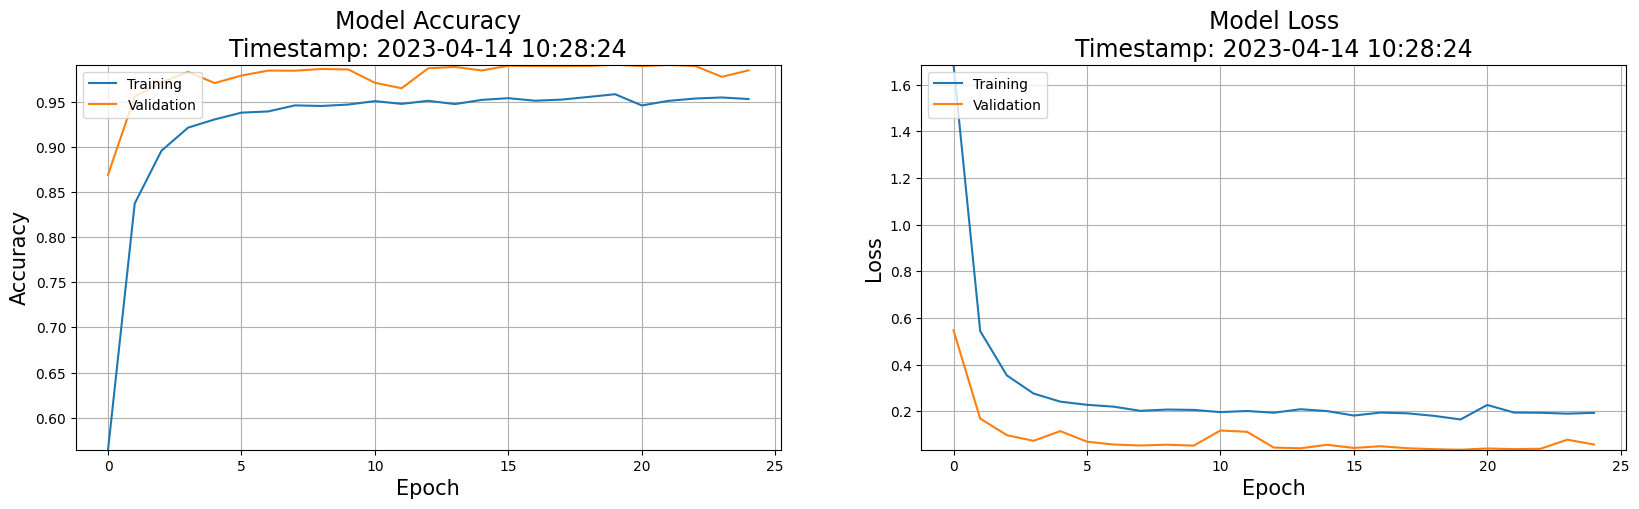

In [47]:
plot_performance(history=history1)

In [54]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('/content/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]


with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('/content/Test/00000.png')
        image = image.resize([30, 30])
        data.append(np.array(image))

X_test=np.array(data)

In [55]:
with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

    from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

395/395 [==============================] - 15s 38ms/step
0.011876484560570071


In [56]:
model.save('traffic_classifier.h5')